# 1. Identify the problem: Can rodent complaints be explained by bldg age in Brooklyn?

# 2. Descriptive statistics:
Generate descriptives for building age and rodent complaints (mean, median, standard deviation); plot histograms, scatterplot. 

Discuss any unusual or unexpected findings.

In [431]:
import numpy as np
import pandas as pd
import sys
import os
import pylab as pl

In [432]:
# 311 Data CSV was filtered for Complaint Type: Rodent and Borough: BROOKLYN
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
0,32310790,01/01/2016 12:00:00 AM,01/20/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,3+ Family Apt. Building,11210.0,2300 KINGS HIGHWAY,...,01/31/2016 08:07:31 AM,The Department of Health and Mental Hygiene wi...,01/20/2016 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,998023.0,162074.0,40.611521,-73.950394,"(40.61152137455337, -73.95039416824221)"
1,32310858,01/01/2016 12:00:00 AM,01/20/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Other (Explain Below),11230.0,1541 E 19TH ST,...,01/31/2016 06:25:33 AM,The Department of Health and Mental Hygiene wi...,01/20/2016 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,996796.0,162439.0,40.612525,-73.954813,"(40.612525046508665, -73.95481274111293)"
2,32310889,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,11232.0,358 43 STREET,...,01/31/2016 03:57:01 PM,The Department of Health and Mental Hygiene wi...,01/01/2016 12:00:00 AM,07 BROOKLYN,BROOKLYN,981656.0,176414.0,40.650892,-74.009348,"(40.650891966208945, -74.0093482505519)"
3,32311212,01/01/2016 12:00:00 AM,01/12/2016 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,3+ Family Apt. Building,11210.0,1145 EAST 35TH STREET,...,01/31/2016 11:08:24 PM,The Department of Health and Mental Hygiene wi...,01/12/2016 12:00:00 AM,Unspecified BROOKLYN,BROOKLYN,1000418.0,167400.0,40.626136,-73.941755,"(40.626136087996805, -73.94175541087431)"
4,32312004,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,1-2 Family Dwelling,11212.0,354 AMBOY STREET,...,01/31/2016 10:14:00 PM,The Department of Health and Mental Hygiene wi...,01/13/2016 12:00:00 AM,16 BROOKLYN,BROOKLYN,1008506.0,180291.0,40.661501,-73.912572,"(40.66150063761366, -73.91257237318781)"


In [433]:
# removing parks and unspecified community districts
df = df[(df['Community Board'] != '55 BROOKLYN')]
df = df[(df['Community Board'] != 'Unspecified BROOKLYN')]

# counting rodent complaints by community district
comm_rod = df.groupby(['Community Board']).count().reset_index()
comm_rod = comm_rod.iloc[:,:2]
comm_rod

,Community Board,Unique Key
0,01 BROOKLYN,573
1,02 BROOKLYN,414
2,03 BROOKLYN,1235
3,04 BROOKLYN,635
4,05 BROOKLYN,487
5,06 BROOKLYN,393
6,07 BROOKLYN,164
7,08 BROOKLYN,683
8,09 BROOKLYN,449
9,10 BROOKLYN,155


I didn't expect the Community Board with the largest count of Rodent complaints to be 'unspecified', nor did I expect to find an actual Community Board (55) with only 1 Rodent complaint when the next smallest count for a Community Board was 155.

In [434]:
# aligning 311 community district column with PLUTO
df.columns = ['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'cd', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Latitude', 'Longitude', 'Location']
df['cd'] = '3' + df['cd'].astype(str)
df['cd'] = df['cd'].str.slice(0,3)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Due Date,Resolution Description,Resolution Action Updated Date,cd,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Latitude,Longitude,Location
2,32310889,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,Vacant Lot,11232.0,358 43 STREET,...,01/31/2016 03:57:01 PM,The Department of Health and Mental Hygiene wi...,01/01/2016 12:00:00 AM,307,BROOKLYN,981656.0,176414.0,40.650892,-74.009348,"(40.650891966208945, -74.0093482505519)"
4,32312004,01/01/2016 12:00:00 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Mouse Sighting,1-2 Family Dwelling,11212.0,354 AMBOY STREET,...,01/31/2016 10:14:00 PM,The Department of Health and Mental Hygiene wi...,01/13/2016 12:00:00 AM,316,BROOKLYN,1008506.0,180291.0,40.661501,-73.912572,"(40.66150063761366, -73.91257237318781)"
6,32312557,01/01/2016 12:00:00 AM,01/06/2016 12:33:41 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Apt. Building,11213.0,930 PROSPECT PLACE,...,01/31/2016 09:05:22 PM,The Department of Health and Mental Hygiene wi...,01/06/2016 12:33:41 PM,308,BROOKLYN,999276.0,184863.0,40.674070,-73.945831,"(40.67407023114603, -73.94583051728789)"
9,32312963,01/01/2016 12:00:00 AM,01/12/2016 03:43:25 PM,DOHMH,Department of Health and Mental Hygiene,Rodent,Signs of Rodents,1-2 Family Dwelling,11208.0,987 CRESCENT STREET,...,01/31/2016 04:52:58 PM,The Department of Health and Mental Hygiene wi...,01/12/2016 03:43:25 PM,305,BROOKLYN,1021167.0,180911.0,40.663159,-73.866934,"(40.66315866212477, -73.86693409345021)"
10,32313240,01/01/2016 12:00:00 AM,12/29/2015 12:00:00 AM,DOHMH,Department of Health and Mental Hygiene,Rodent,Rat Sighting,3+ Family Mixed Use Building,11203.0,651 BROOKLYN AVENUE,...,01/31/2016 10:40:46 AM,The Department of Health and Mental Hygiene wi...,12/29/2015 12:00:00 AM,309,BROOKLYN,999468.0,179035.0,40.658073,-73.945152,"(40.658073341365935, -73.94515150328259)"


In [435]:
# General descriptives for rodent complaints by Community Board:
#print("mean     {:0.0f}".format(comm_rod.describe()['mean']))
#print("median   {:0.0f}".format(comm_rod.median()))
#print("stdev    {:0.0f}".format(comm_rod.describe()['std']))
comm_rod.describe()

,Unique Key
count,18.000000
mean,424.111111
std,260.151741
min,155.000000
25%,232.250000
50%,388.000000
75%,522.250000
max,1235.000000


In [578]:
# check again that 311 data set is cleaned up
ratboards = df.groupby(['cd']).size().reset_index()
ratboards = pd.DataFrame(ratboards)
ratboards.columns = [['cd', 'rodent_complaints']]
ratboards

,cd,rodent_complaints
0,301,573
1,302,414
2,303,1235
3,304,635
4,305,487
5,306,393
6,307,164
7,308,683
8,309,449
9,310,155


In [462]:
# load in PLUTO data for yearbuilt
pluto = pd.read_csv('pluto.csv')
# drop rows without yearbuilt data
pluto = pluto[(pluto['yearbuilt'] != 0)]
pluto = pluto[(pluto['borough'] == 'BK')]
pluto.head()

,the_geom,address,assesstot,bldgarea,borough,cd,landuse,xcoord,ycoord,yearbuilt,zipcode
0,0106000020E61000000100000001030000000100000004...,BROADWAY,4050,0,BK,303,9.0,0,0,1955,0
6,0106000020E61000000100000001030000000100000005...,442 WILLOUGHBY AVENUE,34200,3944,BK,303,2.0,997454,191858,1931,11205
7,0106000020E61000000100000001030000000100000005...,11 LYNCH STREET,143856,9616,BK,301,2.0,995966,194296,2008,11249
8,0106000020E61000000100000001030000000100000005...,585 FLUSHING AVENUE,61235,3503,BK,301,2.0,997734,194260,1934,11206
11,0106000020E61000000100000001030000000100000004...,369 SOUTH 1 STREET,143550,4139,BK,301,7.0,997424,198192,1930,11211


In [587]:
# add column for age of building use yearbuilt
yb = pluto[['cd', 'yearbuilt']]
value = 2017 - yb['yearbuilt']
yb.loc[:, "age"] = value
yb.head()

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:288: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,cd,yearbuilt,age
0,303,1955,62
6,303,1931,86
7,301,2008,9
8,301,1934,83
11,301,1930,87


In [601]:
density = str(yb['cd'])
density.count('302')

16

In [607]:
# grouping by cd and getting average age
newdf = yb.groupby('cd', as_index=False)['age'].mean().round()
newdf = pd.DataFrame(newdf)
newdf
newdf.reset_index()

,index,cd,age
0,0,301,87.0
1,1,302,101.0
2,2,303,87.0
3,3,304,74.0
4,4,306,102.0


In [608]:
# General descriptives for average bldg age by Community Board:
newdf['age'].describe()

count      5.000000
mean      90.200000
std       11.606033
min       74.000000
25%       87.000000
50%       87.000000
75%      101.000000
max      102.000000
Name: age, dtype: float64

In [609]:
# converting all community district values to int before merging datasets
newdf['cd'] = pd.to_numeric(newdf['cd'])
ratboards['cd'] = pd.to_numeric(ratboards['cd'])
print(newdf['cd'])

0    301
1    302
2    303
3    304
4    306
Name: cd, dtype: int64


In [615]:
#merging rodent_complaints with avg bldg age by community district
ratboards.columns
old_homes = pd.merge(ratboards, newdf, how= 'inner', left_on='cd', right_on='cd')

type(ratboards['cd'][0])
print(old_homes)

    cd  rodent_complaints    age
0  301                573   87.0
1  302                414  101.0
2  303               1235   87.0
3  304                635   74.0
4  306                393  102.0


In [616]:
# normalizing rodent_complaint counts by number of bldgs in the community district
old_homes['rodent_complaints'][0] = old_homes['rodent_complaints'][0]/density.count('301')
old_homes['rodent_complaints'][1] = old_homes['rodent_complaints'][1]/density.count('302')
old_homes['rodent_complaints'][2] = old_homes['rodent_complaints'][2]/density.count('303')
old_homes['rodent_complaints'][3] = old_homes['rodent_complaints'][3]/density.count('304')
old_homes['rodent_complaints'][4] = old_homes['rodent_complaints'][4]/density.count('306')
print(old_homes)

    cd  rodent_complaints    age
0  301                 17   87.0
1  302                 25  101.0
2  303                308   87.0
3  304                635   74.0
4  306                 56  102.0


/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# plot histogram, scatterplot

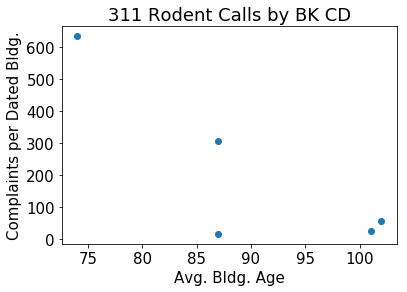

In [633]:
x = old_homes['age']
y = old_homes['rodent_complaints']

pl.plot(x, y, 'o')
pl.xlabel('Avg. Bldg. Age')
pl.ylabel('Complaints per Dated Bldg.')
pl.title('311 Rodent Calls by BK CD')

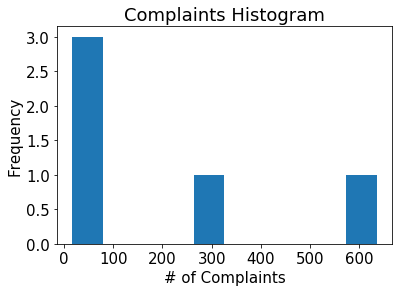

In [632]:
plt.hist(y)
plt.title("Complaints Histogram")
plt.xlabel("# of Complaints")
plt.ylabel("Frequency")

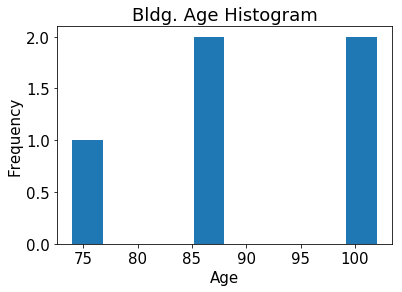

In [631]:
plt.hist(x)
plt.title("Bldg. Age Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Visualization: map the locations of 311 complaints for the specific type you have chosen.

In [639]:
import pandas as pd
from IPython.display import Image, HTML

df = pd.DataFrame(['<img src="311BK.PNG"/>'], columns = ['Image'])

HTML(df.to_html(escape=False))

,Image
0,


# Analysis: Linear Regression

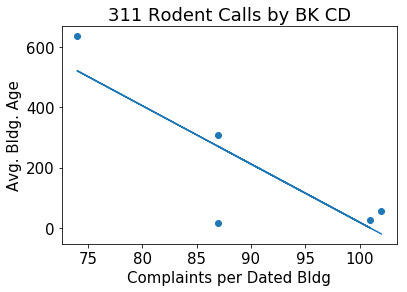

In [634]:
import statsmodels.formula.api as smf

X = old_homes['age']
Y = old_homes['rodent_complaints']

bModel = smf.ols(formula='Y ~ X', data = old_homes).fit()

plt.scatter(old_homes['age'], old_homes['rodent_complaints'])
plt.plot(old_homes['age'], bModel.predict())
plt.xlabel('Complaints per Dated Bldg')
plt.ylabel('Avg. Bldg. Age')
plt.title('311 Rodent Calls by BK CD')

In [626]:
print(bModel.summary())

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n))


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     7.096
Date:                Tue, 10 Oct 2017   Prob (F-statistic):             0.0761
Time:                        07:04:02   Log-Likelihood:                -31.441
No. Observations:                   5   AIC:                             66.88
Df Residuals:                       3   BIC:                             66.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1948.6180    657.666      2.963      0.0

# Discussion: describe how an agency might use your findings to improve service delivery or performance. What agency(ies) would be involved? What are the limitations of your approach? What could you do to improve it?

The New York City Department of Health & Mental Hygiene is the principal agency charged with addressing rodent infestations in New York City. The Department's Pest Control Services Division conducts inspections following receipt of complaints and determines whether exterminations and/or property clean-ups are necessary.

New York Department of Health and Mental Hygiene could use my findings to inform the Office of Pest Control about which buildings, whether a complaint had come through 311 or not, may be at the highest risk of rodent infestation. With enough data points, NYDHMH could develop a predictive model to allocate inspection resources and anticipate where rodents may be before a 311 complaint is even made.

Even though we'd expect to see more rodent complaints in older buildings, my linear regression shows the opposite. This is a reflection of the limitations of small data, as well as the limitations of aggregating a value like building age for a large area like a community district. Because I dropped PLUTO data with a building age and 311 data without a specified community district, my results were narrowed and consequently less generalizable. At a higher level, there is a limitation in using 311 rodent complaints to assess rodent problems given the 

To improve my approach, I would expand the date range for my 311 and bring in additional data on top of PLUTO to gather building age information for more buildings. I would also attempt to associate complaints with buildings, so that the relationship between building age and rodent complaints could analyzed at a more granular level. Lastly, we could begin to join in other building or neighborhood characteristics, like socioeconomics status, to assess whether certain populations are at greater risk of low quality living conditions or are simply not getting equal attention from the city.